# Churn Case Study - Solution Example

Please note! This is some solution code for an aspect of this case study. There are not "right answers" - just useful insights!

# Get Started!

## Part 1: Business problem

#### End Users:

Depends! This can be something you define


#### True business problem:

Depends! This is also something you can define - and it may impact how you care about your metrics

#### Context:

- **True positive**: Someone we predict **will** churn who **actually churns**

- **True negative** : Someone we predict **will not** churn who **actually does not churn**

- **False negative** : Someone we predict **will not** churn who **actually churns**
    - **Outcome**: We didn't realize we were about to lose a customer, and then they left
    
- **False positive** : Someone we predict **will** churn who **actually does not churn**
    - **Outcome**: We thought a customer was going to leave but actually they weren't

## Part 2: Evaluation Metric

Likely, you care more about capturing people who will actually churn - so you will want to minimize false negatives.

- Accuracy
- Precision
- **Recall** - if we have fewer false negatives, our recall score will be higher
- F1-Score

## ~~Part 3: Segment choice~~

~~What type slice/segment/type of churn you are interested in?~~

(this is interesting to think about, but not strictly necessary for this problem)

## Part 4: Data Prep Code

In [11]:
# Import pacakges
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Load dataset
url_link = 'https://docs.google.com/spreadsheets/d/1TAWfdKnWYiCzKUeDyGL6NzIOv7AxFt_Sfzzax464_FQ/export?format=csv&gid=882919979'
telco = pd.read_csv(url_link)

# Drop nas
telco.dropna(inplace=True)

y = np.where(telco.Churn == "Yes", 1, 0)

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(telco.drop(
    columns=['customerID', 'Churn']), y, test_size=0.33, random_state=42)

# Separate out numeric from categorical variables
cat_var = telco.select_dtypes(include='object')
cat_var.drop(columns=['customerID', 'Churn'], inplace=True)

num_var = telco.select_dtypes(exclude='object')

# Encode categorical variables
ohe = OneHotEncoder(drop='first')
encoded_cat = ohe.fit_transform(X_train[cat_var.columns.tolist()]).toarray()

# Add feature names to encoded vars
encoded = pd.DataFrame(
    encoded_cat, columns=ohe.get_feature_names(cat_var.columns.tolist()))

# Reassemble entire training dataset
encoded.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)

clean_X_train = pd.concat(
    [X_train[num_var.columns.tolist()], encoded], axis=1,  sort=False)
clean_X_train.shape

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(2229, 42)

In [12]:
clean_X_train.columns

Index(['SeniorCitizen', 'tenure', 'NumbervMailMessages', 'TotalDayMinutes',
       'TotalDayCalls', 'TotalEveMinutes', 'TotalEveCalls',
       'TotalNightMinutes', 'TotalNightCalls', 'TotalIntlMinutes',
       'TotalIntlCalls', 'CustomerServiceCalls', 'TotalCall',
       'TotalHighBandwidthMinutes', 'TotalHighLatencyMinutes', 'TotalRevenue',
       'gender_Male', 'MaritalStatus_Yes', 'Dependents_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
 

In [7]:
# encoding test set based on previously-fit encoder
encoded_cat = ohe.transform(X_test[cat_var.columns.tolist()]).toarray()

# Add feature names to encoded vars
encoded = pd.DataFrame(
    encoded_cat, columns=ohe.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

# Reassemble entire testing dataset
clean_X_test = pd.concat(
    [X_test[num_var.columns.tolist()], encoded], axis=1,  sort=False)

In [41]:
# more imports

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

## Part 5: Create models

In [18]:
vanilla_mod = LogisticRegression(random_state=12)

In [19]:
vanilla_mod.fit(clean_X_train, y_train)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_train_pred = vanilla_mod.predict(clean_X_train)
y_test_pred = vanilla_mod.predict(clean_X_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred)}")

Training Accuracy: 0.8322117541498429
Testing Accuracy: 0.8171064604185623


### Checking Coefficients


In [53]:
coef_dict = {}
for coef, feat in zip(list(vanilla_mod.coef_[0]), X_train.columns.tolist()):
    coef_dict[feat] = coef

# Convert to dataframe so you can sort it
coef_df = pd.DataFrame.from_dict(coef_dict, columns=['Coef'], orient='index')
coef_df

,Coef
gender,0.001875
SeniorCitizen,-0.112349
MaritalStatus,-0.040665
Dependents,0.005501
tenure,-0.000158
PhoneService,-0.000511
MultipleLines,-0.003361
InternetService,0.001229
OnlineSecurity,-0.003987
OnlineBackup,0.004663


In [58]:
# Sorting to grab the largest by absolute value
coef_df.abs().sort_values(by=['Coef'], ascending=False).head(10)

,Coef
SeniorCitizen,0.112349
MaritalStatus,0.040665
TechSupport,0.011073
TotalDayMinutes,0.007747
TotalRevenue,0.006402
TotalNightMinutes,0.006402
TotalHighBandwidthMinutes,0.006402
CustomerServiceCalls,0.006402
TotalIntlMinutes,0.006402
TotalDayCalls,0.006402


#### IMPORTANT NOTE

You can interpret these coefficients ... but know that we did not scale the data as part of the provided cleaning process! In order to compare across coefficients, the data should be on the same scale and thus comparable. Be sure to tkae this with a grain of salt unless you also scale the training and testing X variables.

### Checking Thresholds

Here, we're examining our vanilla logistic regression model to see whether we should adjust the default threshold, `0.5`, to actually be set at some other point.

As a reminder, the threshold is what we use to decide at what point something is considered a `1` by our model. We can output probabilities from our logistic regression model to see how 'sure' our model is of its classifications. If the probability is really close to `0`, then it's quite sure it belongs to the `0` class, and thus if the probability is quite close to `1` then it's really sure it belongs to the `1` class. 

But what about data it's less sure of, where the probability falls towards the middle? What if it outputs a `0.32`? That's where the threshold comes into play - at a default threshold of `0.5`, then an output of `0.32` will belong to the `0` class. If you adjust your threshold to be `0.3`, then suddenly the probability of `0.32` becomes a `1`. 

In general, if you adjust the threshold, it will impact how likely we are to classify data as a `0` or `1`.

Below is an example of how this might play out in practice, where we're trying to classify if a car will break down (`1`) or will not break down (`0`) based on a single input variable (number of years since a car was last serviced):

![example image from https://aakarshachugh.wordpress.com/2018/06/01/logistic-regression/](https://aakarshachugh.files.wordpress.com/2018/06/aad.png?w=687&h=370)

In [59]:
# Note that we're grabbing results from predict_proba
# This will output probabilities, rather than clean 0/1 predictions

y_train_pred_prob = vanilla_mod.predict_proba(clean_X_train)[:, 1]
y_test_pred_prob = vanilla_mod.predict_proba(clean_X_test)[:, 1]

In [60]:
# to compare the output of .predict to .predict_proba:

print(y_test_pred[:5])
print(y_test_pred_prob[:5])
# note which are considered 0s and which are 1s

[0 0 0 0 1]
[0.0131354  0.02536225 0.34283485 0.02361017 0.5575559 ]


In [61]:
metrics_df = pd.DataFrame(columns=['threshold', 'train_acc', 'test_acc'])

for x in np.arange(y_train_pred_prob.min(), y_train_pred_prob.max(), 0.01):
    placeholder = []
    # Here is where we're defining the threshold for what we consider a 0/1
    threshold = x
    # Here we're manually defining our predicitions based on that threshold
    y_pred_train = np.where(y_train_pred_prob > x, 1, 0)
    y_pred_test = np.where(y_test_pred_prob > x, 1, 0)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    train_pre = precision_score(y_train, y_pred_train)
    test_pre = precision_score(y_test, y_pred_test)
    train_rec = recall_score(y_train, y_pred_train)
    test_rec = recall_score(y_test, y_pred_test)
    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)
    placeholder = [threshold, train_acc, test_acc,
                   train_pre, test_pre, train_rec, 
                   test_rec, train_f1, test_f1]
    sample_S = pd.Series(placeholder, index=[
                         'threshold', 'train_acc', 'test_acc',
                         'train_pre', 'test_pre', 'train_rec',
                         'test_rec', 'train_f1', 'test_f1'
                         ])
    metrics_df = metrics_df.append(sample_S, ignore_index=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


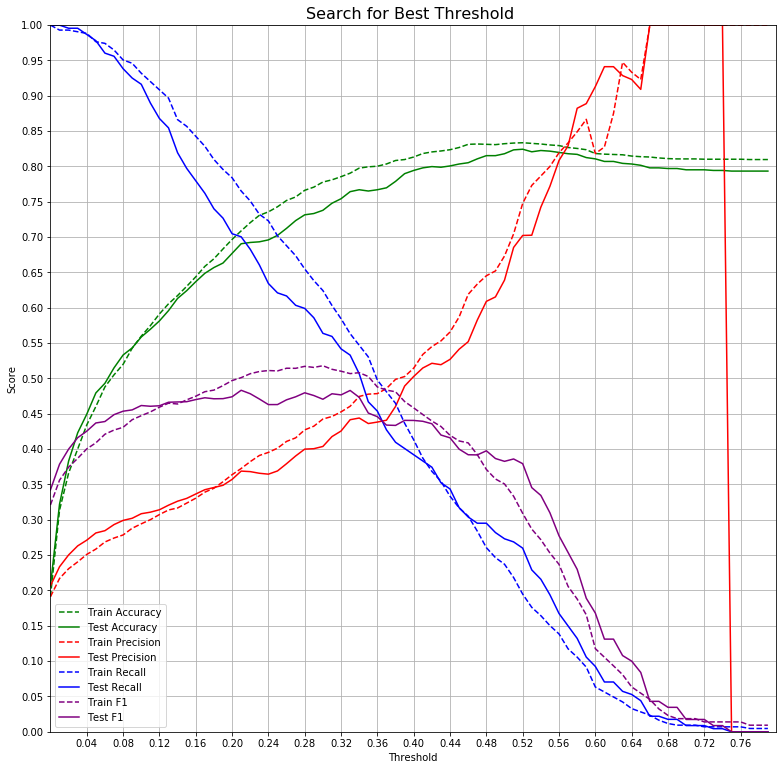

In [62]:
plt.figure(figsize=(13, 13))
plt.title("Search for Best Threshold ",
          fontsize=16)

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.grid(True)

ax = plt.gca()
ax.set_xlim(y_train_pred_prob.min(), y_train_pred_prob.max())
ax.set_ylim(0, 1)
ax.xaxis.set_major_locator(MaxNLocator(20))
ax.yaxis.set_major_locator(MaxNLocator(20))

# Get the regular numpy array from the MaskedArray
X_axis = np.array(metrics_df['threshold'].values, dtype=float)

ax.plot(X_axis, metrics_df['train_acc'], ls='--',
        color='g', label='Train Accuracy')
ax.plot(X_axis, metrics_df['test_acc'], ls='-',
        color='g', label='Test Accuracy')
ax.plot(X_axis, metrics_df['train_pre'], ls='--',
        color='r', label='Train Precision')
ax.plot(X_axis, metrics_df['test_pre'], ls='-',
        color='r', label='Test Precision')
ax.plot(X_axis, metrics_df['train_rec'], ls='--',
        color='b', label='Train Recall')
ax.plot(X_axis, metrics_df['test_rec'], ls='-',
        color='b', label='Test Recall')
ax.plot(X_axis, metrics_df['train_f1'], ls='--',
        color='purple', label='Train F1')
ax.plot(X_axis, metrics_df['test_f1'], ls='-',
        color='purple', label='Test F1')

plt.legend()
plt.show()

#### Interpretation:

Depending on our metric, where we define our threshold will vary. If you cared more about one specific metric than any others, you'd only visualize that metric versus threshold to help see where you should might consider defining your non-default threshold.